In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset100/dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('/kaggle/input/dataset100/dataset.csv')

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

50 - 94

In [6]:
data = data.dropna()

In [7]:
data.shape
top_genres = data['track_genre']

# Вывод результата
print(top_genres)

0            acoustic
1            acoustic
2            acoustic
3            acoustic
4            acoustic
             ...     
113995    world-music
113996    world-music
113997    world-music
113998    world-music
113999    world-music
Name: track_genre, Length: 113999, dtype: object


In [8]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [9]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [10]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [11]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# Расшифровка столбцов:
**track_id - айди трека**

**artists - исполнители**

**album_name - имя альбома**

**track_name - имя трека**

**popularity - популярность**

**duration_ms - длительность трека**

**explicit - мат/не мат**

**danceability - значение, отвечающее за танцевальную музыку**

**energy - значение, отвечающее за энергичность песни**

**loudness - громкость музыки(в децибелах)**

**mode - настроена ли песня на лад или нет**

**speechiness - есть ли слова в музыке**

**acousticness - акустика музыки(процент, насколько не используется электро-муызка)**

**instrumentalness - значение преобладания инструментала**

**liveness - значение, которое отвечает насколько музыка удобна для живого звука**

**valence - значение, определяющая позитивность музыки**

**tempo - значение музыки в bpm**

**track_genre - жанр музыки**

**time_signature - что то непонятное, связанное с ритмичностью**


# Анализ данных

## **Прежде чем начинать проводить анализ данных стоит построить гипотезы:

**1 гипотеза: популярность трека зависит от жанра, в котором был сделан трек**

Ожидания популярности rap,rock, k-pop

**2 гипотеза: популярность трека зависит от позитивности музыки**

**3 гипотеза: популярность трека зависит от ритма музыки в bpm**

**4 гипотеза: популярность трека зависит от энергичности и танцевальности(в совокупности)**


**5 гипотеза: мат(марка explicit) не влияет на популярность треков**



# 1 гипотеза(популярность корелирует с жанром)


## Построим графики

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Топ 10 популярных жанров музыки на основе значения популярности

     track_genre  popularity
0       acoustic      42.483
1       afrobeat      24.399
2       alt-rock      33.943
3    alternative      24.337
4        ambient      44.191
..           ...         ...
109       techno      39.042
110       trance      37.635
111     trip-hop      34.460
112      turkish      40.698
113  world-music      41.873

[114 rows x 2 columns]


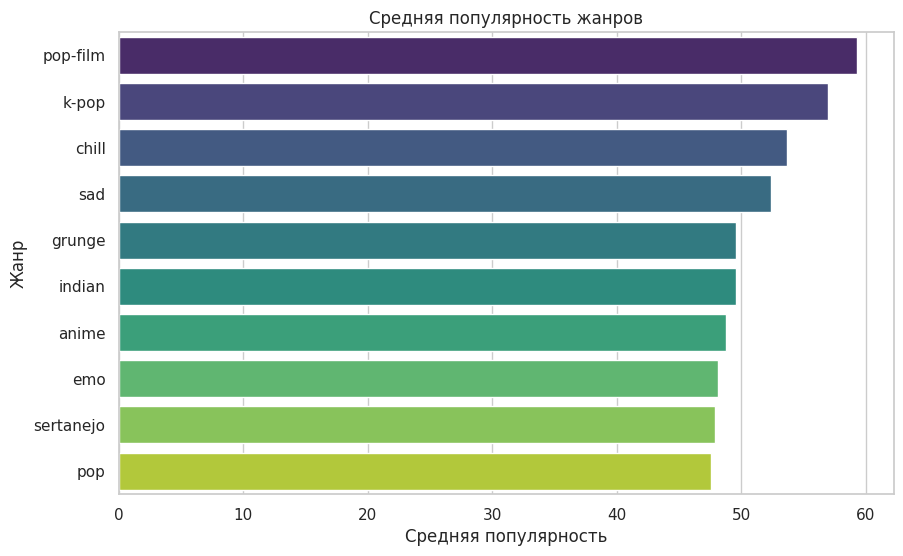

In [13]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().reset_index()
print(genre_popularity)# вычисляем среднюю популярность каждого жанра
genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False)
sns.set(style="whitegrid")
# Создание графика
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=genre_popularity.head(10), palette='viridis')
plt.title('Средняя популярность жанров')
plt.xlabel('Средняя популярность')
plt.ylabel('Жанр')
plt.show()

#### **Первые выводы**

**1.3 из 10 жанров являются песнями, закрепленными за культурой государства(anime(Япония), k-pop(Корея), indian(Индия))**

**2.В топе преобладает позитивная музыка(это наталкивает нас на то, что гипотеза, связанная с valence может сработать)**

**3 Приставка pop в 3 жанрах дает представление, что спецификация музыки pop сама по себе является популярной, то есть можем предположить,
что музыка самого направления Pop, а также смежные жанры очень популярны**




<!-- ### DANCEABILITY, ENERGY, VALENCE в каждом жанре топа 10
#### По первым выводам было выявлено, что популярные треки как то связаны с позитивностью -->

### График распределения популярности треков в каждом из популярных жанров ##


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


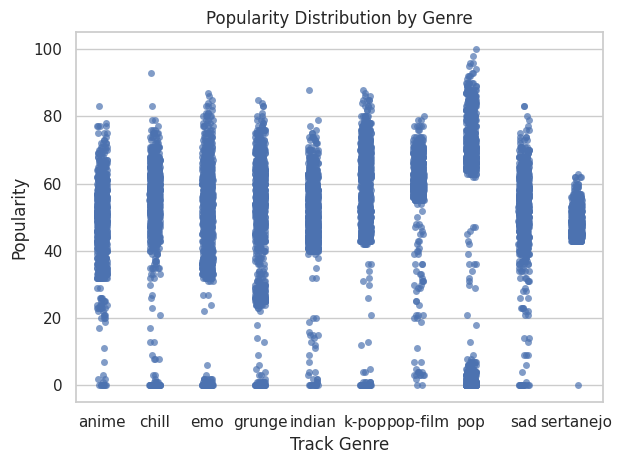

In [14]:
# Вычисляем среднюю популярность для каждого жанра
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

top_genres = genre_popularity.head(10).index.tolist()

# Фильтруем данные по самым популярным жанрам
filtered_df = data[data['track_genre'].isin(top_genres)]

genres = genre_popularity.head(10).index.tolist()
filtered_df = data[data['track_genre'].isin(genres)]

# Настройка графика
sns.stripplot(x='track_genre', y='popularity', data=filtered_df, jitter=True, alpha=0.7)

# Установка заголовка и меток
plt.title('Popularity Distribution by Genre')
plt.ylabel('Popularity')
plt.xlabel('Track Genre')

# Показ графика
plt.tight_layout()
plt.show()

#### Выводы о графике ####

**Пока не совсем понятно, что можно отсюда извлечь для формирования признаков, но можно упомянуть следующее:у pop довольно большие показатели популярности, выше чем у первого места, но вниз тянут довольно большое количество треков низкой популярности, антонимом к pop является sertanejo, где можно увидеть уверенное среднее значение, колеблющиеся в районе 40-60**


## Выводы ##
#### **Мои оправдания не увенчались успехом** ####

#### **Пока на данном этапе выделены топ 10 популярных жанров, жанр будет определять популярность довольно сильно, особенно жанры с приставкой pop** ####



# 2 гипотеза(популярность корелирует с позитивностью)

### График 50 популярных треков со значением valence ##

/tmp/ipykernel_30/3702405551.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='valence', data=top_tracks, ci=None)


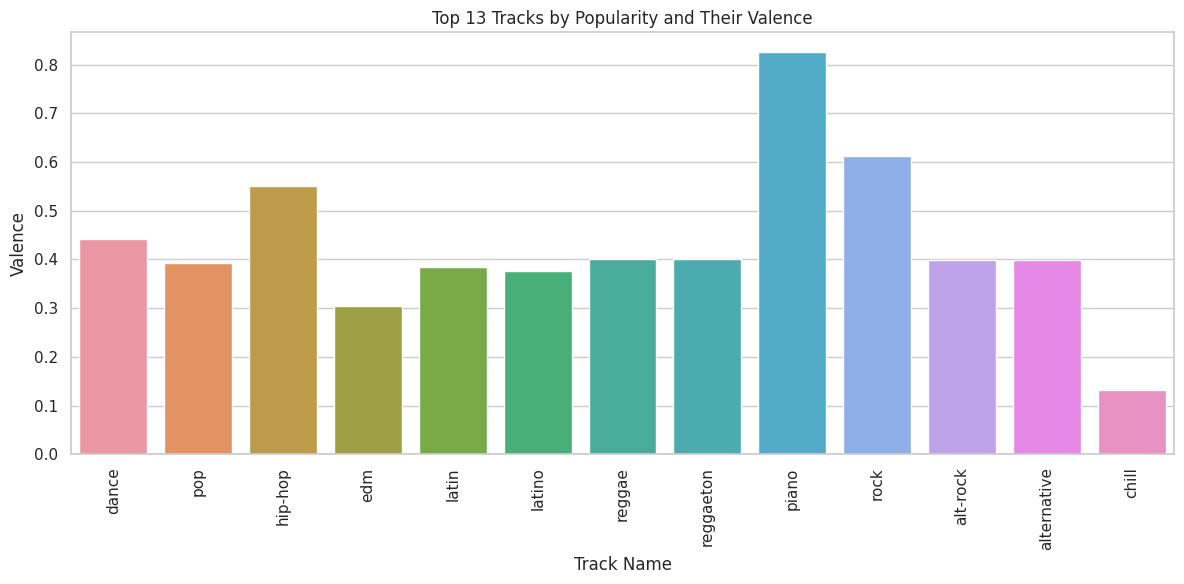

In [15]:
top_tracks = data.nlargest(50, 'popularity')

# Настройка графика
plt.figure(figsize=(12, 6))

# Используем barplot для визуализации значений valence для топ-50 треков
sns.barplot(x='track_genre', y='valence', data=top_tracks, ci=None)

# Установка заголовка и меток
plt.title('Top 13 Tracks by Popularity and Their Valence')
plt.ylabel('Valence')
plt.xlabel('Track Name')

# Поворачиваем метки по оси X для удобства
plt.xticks(rotation=90)
plt.tight_layout()

# Показ графика
plt.show()

#### Выводы о графике ####

**Взята выборка в 19 популярных треков,установлено, что популярность не зависит от позитивности песни, так как в данном распределении мы видим равное разделение по значению выше и ниже 0,4, что не дает нам формировать признак для feature engineering**

### Тот же график(среднее значение valence по 10 популярным жанрам) ##

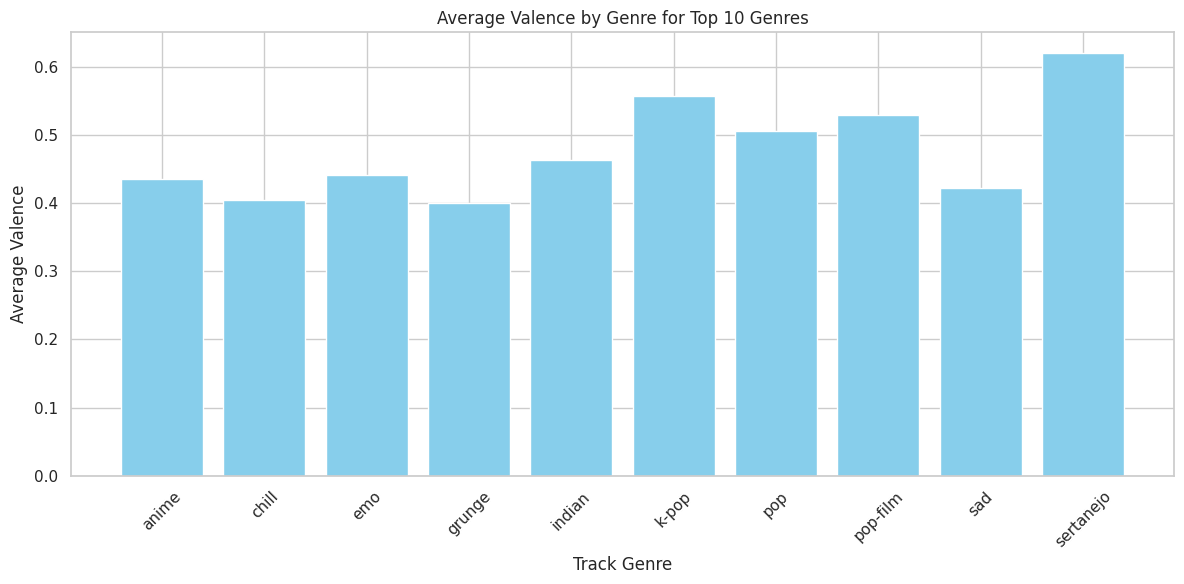

In [16]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_genres = genre_popularity.head(10).index.tolist()

# Фильтрация данных по топ-10 жанрам
filtered_df = data[data['track_genre'].isin(top_genres)]

# Группировка и расчет среднего значения valence для каждого жанра
genre_means = filtered_df.groupby('track_genre')['valence'].mean()

# Создание графика
plt.figure(figsize=(12, 6))
plt.bar(genre_means.index, genre_means.values, color='skyblue')

# Настройка заголовка и меток
plt.title('Average Valence by Genre for Top 10 Genres')
plt.ylabel('Average Valence')
plt.xlabel('Track Genre')

# Поворот меток по оси X для удобства
plt.xticks(rotation=45)
plt.tight_layout()

# Показ графика
plt.show()

**Данный график подтверждает мои слова,среднее значение 0,4 не дает преимуществ ни одному из 10 популярнейших жанров**

## Вывод о гипотезе
### **Гипотеза не подтверждена, провал**

# 3 гипотеза(популярность корелирует с ритмичностью(bpm))

### График всех треков с параметром tempo(bpm) ##

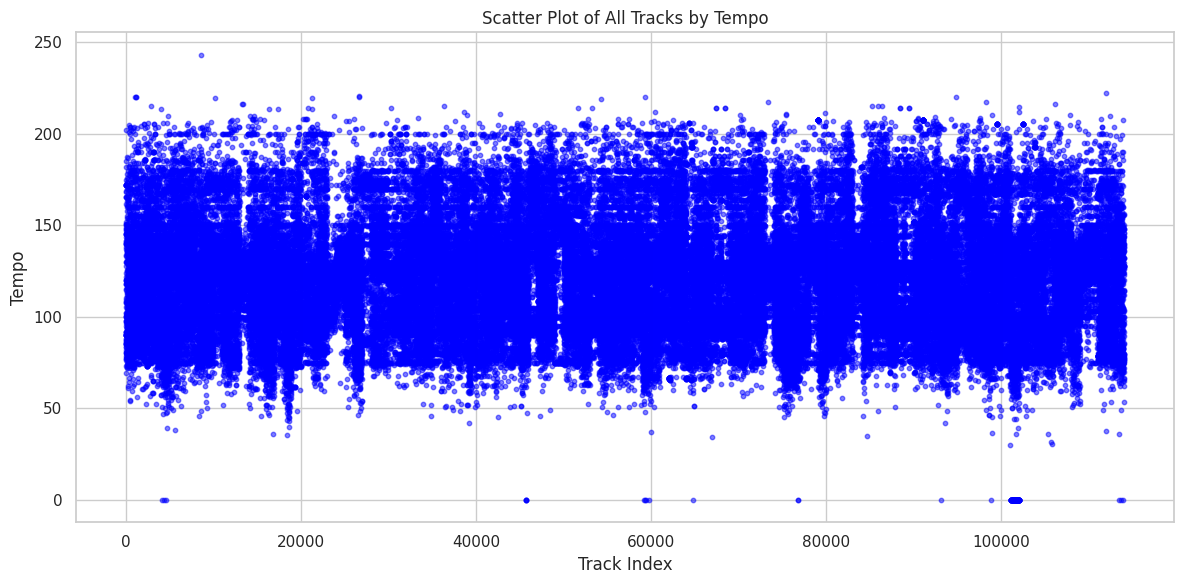

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['tempo'], alpha=0.5, color='blue', s=10)

# Настройка заголовка и меток
plt.title('Scatter Plot of All Tracks by Tempo')
plt.ylabel('Tempo')
plt.xlabel('Track Index')

# Показ графика
plt.tight_layout()
plt.show()

### Выводы о графике ###
**На первом графике видно распределение быстрой и медленной музыки, однако значения в основном колеблятся от 50-200, что может говорить о том, что tempo как параметр незначим, так как распределение в целом среднее, посмотрим следующий график**

### График 50 популярных треков и их значения tempo

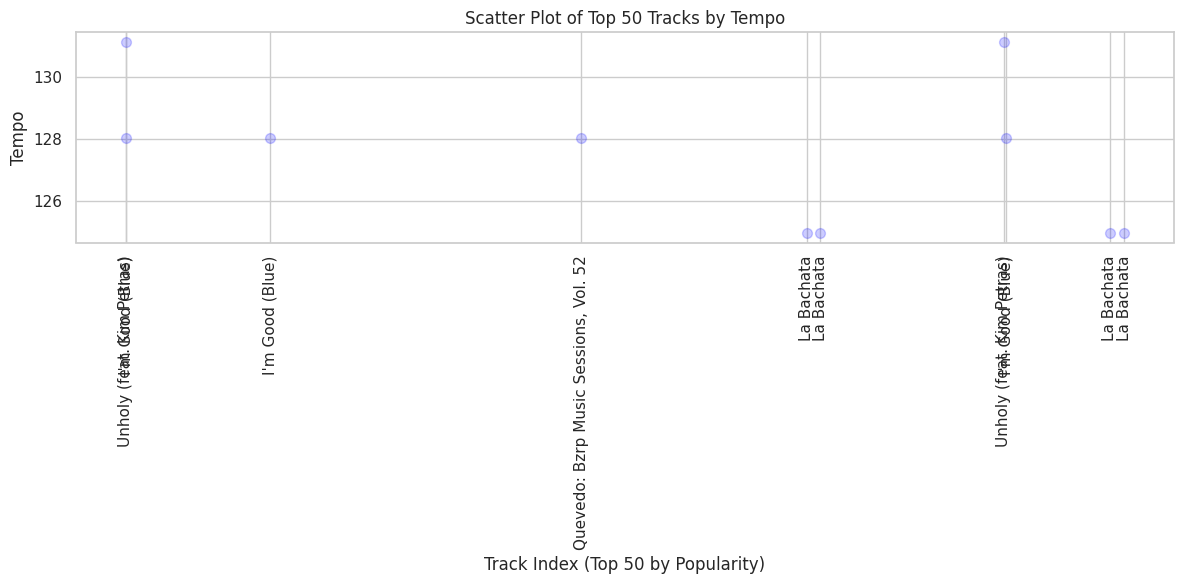

In [18]:
top_tracks = data.nlargest(10, 'popularity')

# Создание диаграммы рассеяния для 50 популярных треков
plt.figure(figsize=(12, 6))
plt.scatter(top_tracks.index, top_tracks['tempo'], alpha=0.2, color='blue', s=50)

# Настройка заголовка и меток
plt.title('Scatter Plot of Top 50 Tracks by Tempo')
plt.ylabel('Tempo')
plt.xlabel('Track Index (Top 50 by Popularity)')

# Подписываем ось X метками треков
plt.xticks(top_tracks.index, top_tracks['track_name'], rotation=90)

# Показ графика
plt.tight_layout()
plt.show()

### Выводы о графике
**График также не подтверждает гипотезу, так как легко можно увидеть, что распределение колеблется возле одного значения**

## Общий вывод
### **Гипотеза не подтверждена, провал фатальный**

## 4 гипотеза(популярность корелирует с энергичностью и танцевальностью)¶

### Тепловая карта популярности треков по DanceAbility и Energy

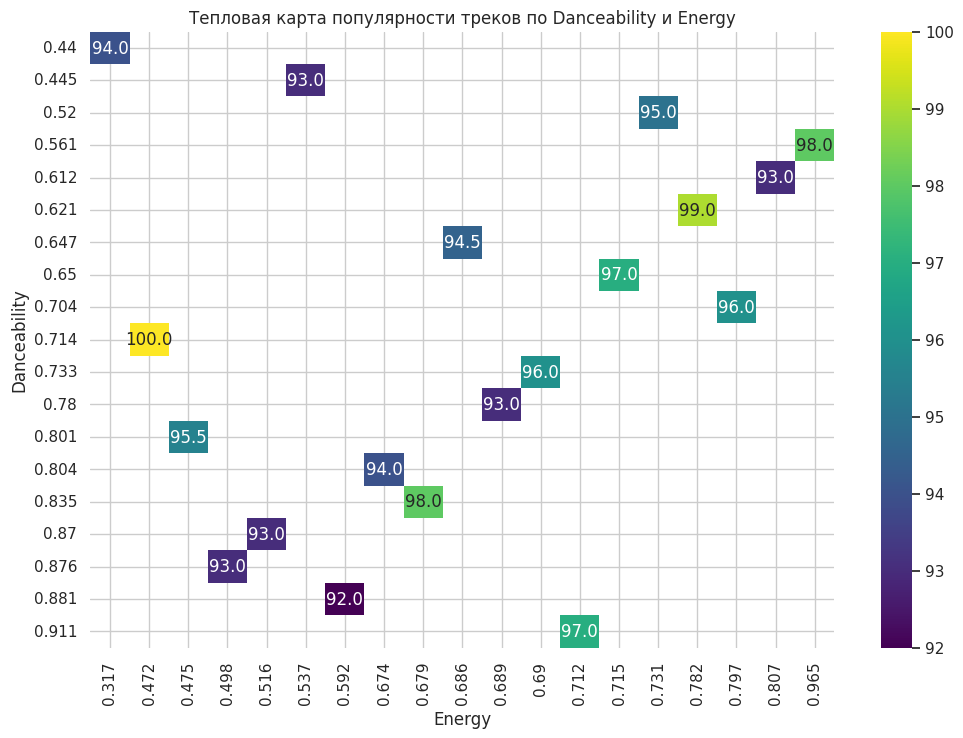

In [19]:
top_50_tracks = data.nlargest(50, 'popularity')

# Создаем график
heatmap_data = top_50_tracks.pivot_table(values='popularity', index='danceability', columns='energy', aggfunc='mean')

# Создаем тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f")
plt.title('Тепловая карта популярности треков по Danceability и Energy')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

### Вывод о графике
**Есть за что уцепиться, так как видим, что в среднем значение уходят за 0,7, это может только указывать, что большинство популярных песен(в данной выборке их 18) энергичны и подходят для танцев, что наталкивает на мысль,что в основном музыку используют для отдыха и для поддержания настроения**

## Выводы о гипотезе 
#### **С ней можно работать, стоит поиграться с параметрами танцевальности и энергичности**

## 5 гипотеза(влияние explicit на треки)¶


### График подсчета true-explicit и false-explicit треков

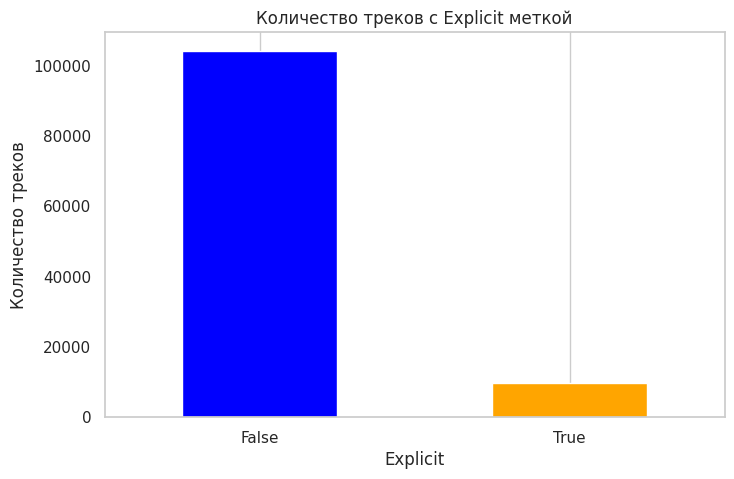

In [20]:
explicit_count = data['explicit'].value_counts()
plt.figure(figsize=(8, 5))
explicit_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Количество треков с Explicit меткой')
plt.xlabel('Explicit')
plt.ylabel('Количество треков')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.grid(axis='y')


plt.show()

### Вывод о графике
**Большинство треков датасета не содержат мат, треков с меткой Explciit меньше 10000**

### График средней популярности музыки по explicit метке

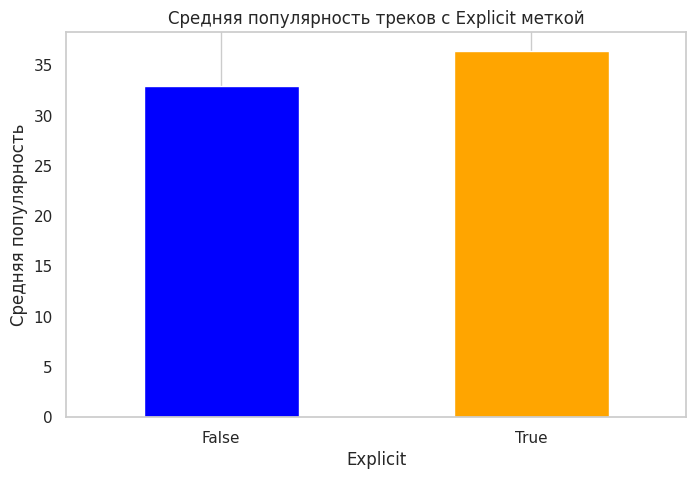

In [21]:
mean_popularity = data.groupby('explicit')['popularity'].mean()

plt.figure(figsize=(8, 5))
mean_popularity.plot(kind='bar', color=['blue', 'orange'])

# Настройка графика
plt.title('Средняя популярность треков с Explicit меткой')
plt.xlabel('Explicit')
plt.ylabel('Средняя популярность')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.grid(axis='y')

# Показ графика
plt.show()

### Вывод о графике
**Бинго! Гипотеза подтверждена, популярность слабо связана со столбцом Explicit**

## Выводы в общем
### 1 Гипотеза: подтверждена, поскольку можно заметить тенденцию в выборке 10 популярных жанров музыки(в выборке большинство занимают жанры с приставкой pop и музыка конкретных стран)
### 2 Гипотеза: провальна, атрибут valence(позитивность музыки) не показывает сильной корреляции со значением popularity, однако мы не можем полагать, что столбец является не значимым(не стоит убирать из датасета)
### 3 Гипотеза: провальна, tempo распределена нормально, не виден конкретный перевес в сторону отрицательной или положительной корреляции, tempo можно попробовать удалить
### 4 Гипотеза: подтверждена, есть основания полагать, что energy и danceability имеют влияние на параметр popularity
### 5 Гипотеза: подтверждена, действительно, музыка с пометкой Explicit действительно не влияет на популярность, параметр не значим для обучения следующих моделей


### 3 гипотезы прошли, на них мы будем опираться в следующем этапе: Feature Engineering. 2 гипотезы не прошли, закончившись неудачей

# Feature Engineering


### Вспомним датасет

In [22]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Ознакомимся с матрицой корреляции, прежде чем использовать наши наработки

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.corr()['popularity'].sort_values(ascending=False)

/tmp/ipykernel_30/820788830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipykernel_30/820788830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
/tmp/ipykernel_30/820788830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

popularity          1.000000
loudness            0.050420
explicit            0.044078
album_name          0.042501
danceability        0.035444
track_genre         0.032696
Unnamed: 0          0.032146
time_signature      0.031076
tempo               0.013212
track_name          0.011935
artists             0.003636
track_id            0.003230
energy              0.001053
key                -0.003847
liveness           -0.005397
duration_ms        -0.007129
mode               -0.013948
acousticness       -0.025458
valence            -0.040522
speechiness        -0.044930
instrumentalness   -0.095147
Name: popularity, dtype: float64

### Заметим, что loudness значимо коррелирует с popularity, попробуем построить несколько графиков

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


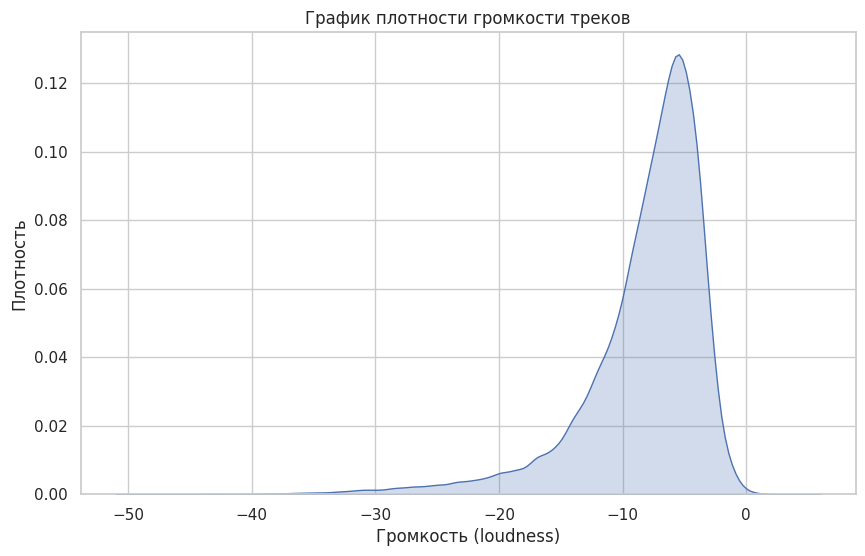

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['loudness'], fill=True)
plt.title('График плотности громкости треков')
plt.xlabel('Громкость (loudness)')
plt.ylabel('Плотность')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


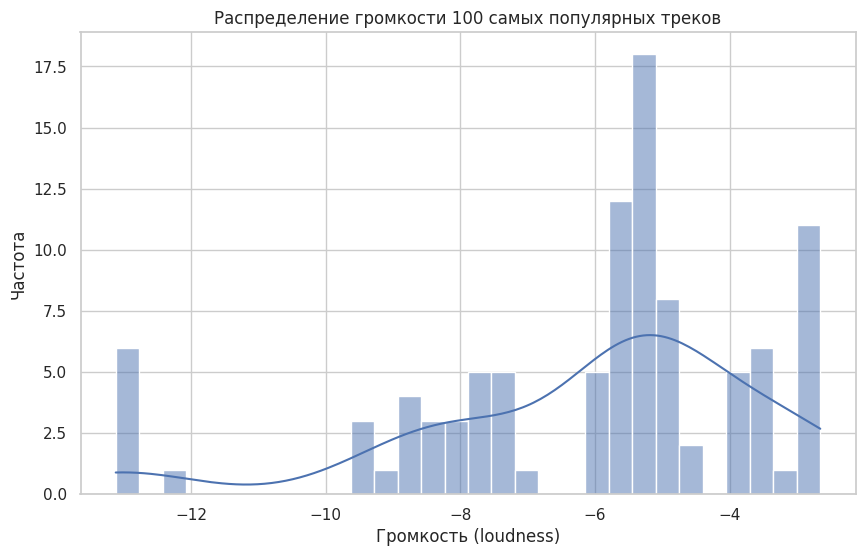

In [25]:
top_tracks = data.nlargest(100, 'popularity')

plt.figure(figsize=(10, 6))
sns.histplot(top_tracks['loudness'], bins=30, kde=True)
plt.title('Распределение громкости 100 самых популярных треков')
plt.xlabel('Громкость (loudness)')
plt.ylabel('Частота')
plt.show()

### Можем заметить, что loudness обычно не превышает -15, что говорит нам об средней громкости треков, это замечание можно использовать в формировании новых признаков

## Формируем признаки

In [26]:
data['is_quiet'] = (data['loudness'] < -15).astype(int) # Формируем новый столбец, is_quiet, который будет соответствован средным значениям громкости треков
data['popularity'] = data['popularity'] / 100 # Я заметил, что popularity разбросано в диапазоне от 0 до 100, что мешает нам преобразовать диапазон с 0 до 1?
data = data.drop(columns=['Unnamed: 0']) # В таблице важности признаков Unnamed занял место в нерелевантных значениях, я решил удалить
data = data.drop(columns=['explicit'])

# Неудачная feature
# data['new_positivity'] = data['danceability'] + data['energy'] # Попробуем объеденить значения danceability и energy в новый столбец new_positivity

/tmp/ipykernel_30/2661621593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_quiet'] = (data['loudness'] < -15).astype(int) # Формируем новый столбец, is_quiet, который будет соответствован средным значениям громкости треков
/tmp/ipykernel_30/2661621593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['popularity'] = data['popularity'] / 100 # Я заметил, что popularity разбросано в диапазоне от 0 до 100, что мешает нам преобразовать диапазон с 0 до 1?


#### POV: На самом деле для оптимальных значений параметров мне хватило первых 3 строк блока Feature Engineering, я вернулся к формированию новых утверждений после написания моделей машинного обучения
Немного поэксперементировав, я понял, что 2 последних фичи были лишними, остальные преобразования хорошо сочетались с решением моих моделей, что заставляет меня думать об правильности моих утверждений.

Поэтому больше фич я разрабатывать не стал, дабы сохранить оптимальную ошибку и другие метрики

## Модели машинного обучения
### Keras нейронная сеть

#### Подготовка данных

In [27]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import GradientBoostingRegressor

#### Сама модель

### Для начала накидаем слои без регуляризаторов и dropout, посмотрим, что получится

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Input
from sklearn import metrics
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0813
Test Loss: 0.08048802614212036


Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0472 - val_loss: 0.0445
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0437 - val_loss: 0.0436
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0419 - val_loss: 0.0424
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0410 - val_loss: 0.0421
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0398 - val_loss: 0.0415
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0389 - val_loss: 0.0408
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0381 - val_loss: 0.0405
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0370 - val_loss: 0.0407
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0364 - val_loss: 0.0402
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0362 - val_loss: 0.0405


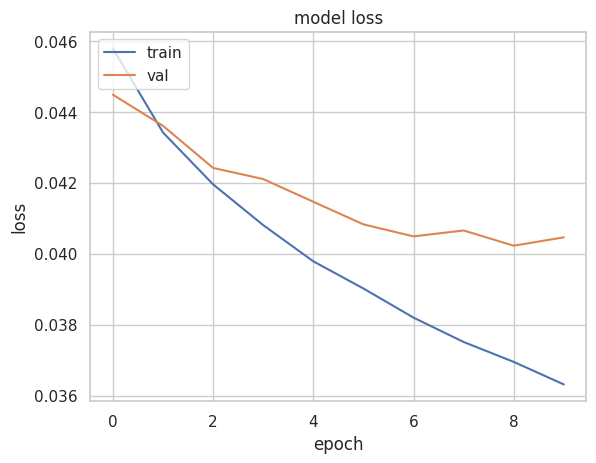

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Идет небольшое переобучение, попробуем вставить Dropout, поиграв с коэффицентами, паралелльно увеличив количество эпох

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Input
from sklearn import metrics
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')



713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0817
Test Loss: 0.08111973106861115


Epoch 1/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0476 - val_loss: 0.0453
Epoch 2/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0445 - val_loss: 0.0441
Epoch 3/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0432 - val_loss: 0.0435
Epoch 4/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0421 - val_loss: 0.0422
Epoch 5/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0413 - val_loss: 0.0419
Epoch 6/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0404 - val_loss: 0.0411
Epoch 7/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0401 - val_loss: 0.0407
Epoch 8/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0394 - val_loss: 0.0404
Epoch 9/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0393 - val_loss: 0.0405
Epoch 10/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0391 - val_loss: 0.0401
Epoch 11/25
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0378 - val_loss: 0.0399
Epoch 12/25
2280/2280 ━━━━━━━━

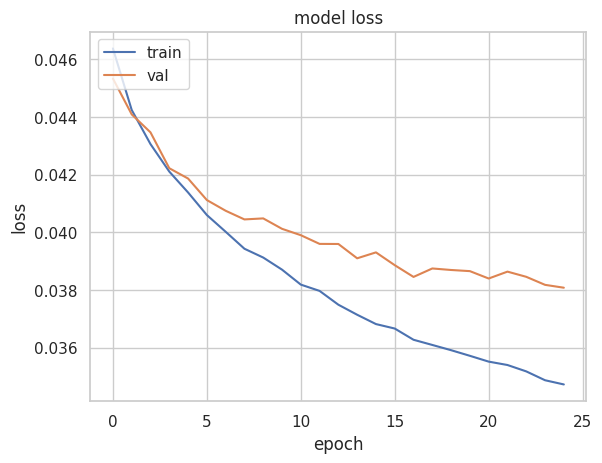

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Средняя квадратичная ошибка (MSE): 0.0375843043505823
Коэффициент детерминации (R²): 0.24238859401639323
Абсолютная ошибка 0.1515747982513903 
RMSE: 0.19386671800642394


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)
y_pred = model.fit
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод основных параметров
print("Средняя квадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Абсолютная ошибка {mae} ")

print(f'RMSE: {rmse}')

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод основных параметров
print("Средняя квадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Абсолютная ошибка {mae} ")

print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Средняя квадратичная ошибка (MSE): 0.0375843043505823
Коэффициент детерминации (R²): 0.24238859401639323
Абсолютная ошибка 0.1515747982513903 
RMSE: 0.19386671800642394


### Получаем довольно неплохой результат

### Модель градиентного спуска

#### 1 попытка
#### задаем минимальные параметры

In [34]:
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"r2 : {r2}")


0.038601148744459524
r2 : 0.22189139647015377


#### 0.038660756778985374

#### Попробуем увеличить learning_rate и max_depth
#### 2 попытка


In [35]:
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.3, max_depth = 7, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"r2 : {r2}")
print(mean_squared_error(y_test, y_pred))
# 0.02066331597285392


r2 : 0.5846944235293453
0.020602872476955376


In [36]:
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.5, max_depth = 10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"r2 : {r2}")
print(mean_squared_error(y_test, y_pred))
#0.018823996824933308


r2 : 0.6171236485903546
0.018994092758328914


#### 0.018823996824933308
#### 3 попытка


#### На этом значении я остановился. Дальше эксперименты с learning_rate > 0.5, max_depth > 10 не имеют значения, так как не уменьшают ошибку(MSE)
Вывод: при увеличении max_depth и learning_rate наблюдает значительное уменьшение ошибки и улучшении показателей, однако увеличение эффективно до определенных значений(learning_rate = 0.5, max_depth = 10), предполагаю,что
засчет увеличении глубины обучения и засчет большого количества записей нейросеть обучается намного эффективней


### Модели линейной регрессии

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lin_reg_model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.048476633457333815
R² Score: 0.02282479174332197


In [38]:

lr = RidgeCV(alphas=np.arange(70,200,0.5), fit_intercept=True)
lr.fit(X_train, y_train)
# Предсказание на тестовой выборке
y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод основных параметров
print("Средняя квадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)


Средняя квадратичная ошибка (MSE): 0.048476120220115014
Коэффициент детерминации (R²): 0.022835137401640226


#### Вывод:Линейная регрессия не показывает хороших результатов на датасете Spotify, попробовав два типа линейной регрессии по параметрам не нашел никакой разницы(она несущественна).Можем считать, что линейная регрессия слишком проста для данного датасета, и не имеет поднастроек, чтобы сделать модель гибче и эффективней

### Модели деревьев решений
#### Пожалуй, попробуем знакомый мне RandomForestRegressor(по опыту титаника)
RandomForestRegressor это модификация RandomForestClassifier, что позволяет алгоритму дерева решений быть гибче и использоваться в разных ML задачах.
Вспомним, что алгоритм случайного леса основан на деревьях, они обрабатывают сэмпл данных и предсказывают свои значения, далее выбираются самые лучшие значения на основе голосования.

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42) # Я попробовал добавить сюда max_depth, но это не привело к улучшению метрики
rf_regressor.fit(X_train, y_train.ravel()) 
y_pred_regressor = rf_regressor.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred_regressor)
r2 = r2_score(y_test, y_pred_regressor)

# Вывод основных параметров
print("Средняя квадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R²):", r2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Абсолютная ошибка {mae} ")

print(f'RMSE: {rmse}')

/tmp/ipykernel_30/1543135677.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  rf_regressor.fit(X_train, y_train.ravel())


Средняя квадратичная ошибка (MSE): 0.01954199203859649
Коэффициент детерминации (R²): 0.6060792844273527
Абсолютная ошибка 0.18377071998455125 
RMSE: 0.1397926751965084


#### Вывод: на удивление RandomForestClassifier сработал достаточно неплохо, мы видим, что R2 score стремится больше к 1 чем к 0, MSE довольно низкая по сравнению с линейной регрессией и нейронной сетью, остальные метрики не сказать, чтобы лучшие,которые можно получить, но находятся на среднем уровне

## Самые оптимальные параметры показал....
### GradientBoosterRegressor
### Но почему?
В ходе своего расследования я выяснил, что из всех 4 моделей показали самый лучший результат классификаторы, работающие на основе алгоритмов деревьев.
По моему мнению, линейная регрессия является простой моделью, которая ищет линейную связь между признаками, в данном же датасете она не прослеживается, когда алгоритмы деревьев проводят более глубокий анализ признаков и датасета, выстраивая более сложную связь.Тем самым мы можем заметить, что классфикатор случайного леса показывает приблизительные результаты градиентного регрессора.В дополнение, линейная регрессия не гибка, мы не можем провести глубокую настройку под нужды нашего датасета, пока классфикаторы на основе алгоритмом деревьев предоставляют функционал работы с глубиной, с количеством деревьев и т.д

### Проведем кросс-валидацию

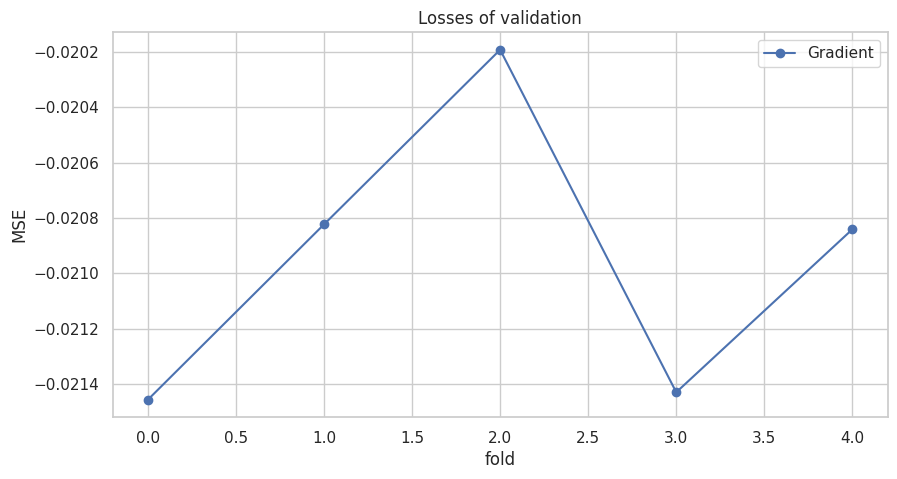

In [41]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
# from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.model_selection import KFold, cross_val_predict

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.5, max_depth=10, random_state=42)
n_splits = 5
kf = KFold(n_splits=n_splits)
mse_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

plt.figure(figsize=(10, 5))
plt.plot(mse_scores, marker='o', label="Gradient")
plt.title("Losses of validation")

plt.xlabel("fold")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Выводы по работе

Мною был проанализирвоан датасет Spotify, были сделаны следующие замечания:
1. Я поработал с разведовательным анализом и попробовал установить связь между жанром трека и популярностью, связь просматривается, но требует дальнейшей и более глубокой обработки
2. Установив в каком направлении мне стоит работать с признаками, я попробовал feature engineering, но не смог в достаточной мере раскрыть потенциал этого инструмента именно в этом датасете, связано это с тем, что данные переданные о музыкальных треках довольно тяжело сводятся к кластеру сильной связи с popularity, поэтому feature engineering здесь не является значимым инструментом.Сначала я полагал, что у меня не получается найти признаки и преобразовать их для улучшения метрик следующей моделей, я решил сначала написать модели и заметил, что метрики неплохие,поэтому решил попробовать создать несколько фич чтобы заставить нейронные сети работать еще лучше, но пришел к выводу, что моих знаний пока не хватает, чтобы создать успешные признаки, либо, как я еще думаю, датасет не располагает достаточными данными для создания полезных признаков.
3. Определившись с базовыми изменениями признаков, я попробовал себя в построении моделей машинного и глубокого обучения.Считаю, что в этой части я получил довольно хороший опыт понимания работы нейронных сетей, разобрался с линейной регрессией, подумал,почему она здесь не применяется, поиграл с параметрами нейронной сети Keras.
4. Определил, что градиетный спуск наиболее оптимален для данного датасета, показав лучшие результаты
5. Однако, сделав кросс-валидацию для моей лучшей модели GradientBoostingRegressor я увидел,что график не являлся стабильным, он походил больше на ломаную линию, показывая, что модель не имеет тенденцию идти всегда вниз, наооборот, ошибка то подскакивает, то идет вниз
   Подводя итоги, я думаю, что данная работа в общем улучшила мои навыки анализировать данные, разбираться в новом материале, она показалась мне довольно интересной, хотя и стоила достаточно много времени в силу своей объемности

   Подготовил Игнатьев Алексей Андреевич РИ-230941